In [5]:
import numpy as np

class PCA:
    
    def __init__(self, n_components) -> None:
        self.n_components = n_components
        self.mean = None
        self.components = None
    
    def fit(self, X):
        
        self.mean = np.mean(X, axis=0)
        
        X = X - self.mean
        
        cov = np.cov(X.T)
        
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        
        idxs = np.argsort(eigenvalues.T)[::-1]
        eigenvectors = eigenvectors[idxs]
        eigenvalues = eigenvalues[idxs]
        
        self.components = eigenvectors[:self.n_components]
    
    def transform(self, X):
        
        X = X - self.mean
        
        return np.dot(X, self.components.T)

In [26]:
from sklearn.datasets import load_iris
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

data = load_iris()

X = data.data
y = data.target

pca = PCA(n_components=2)

pca.fit(X[:, :3])

X_transform = pca.transform(X[:, :3])

print('Shape of original X: ', X.shape)
print('Shape of transformed X: ', X_transform.shape)


Shape of original X:  (150, 4)
Shape of transformed X:  (150, 2)


/var/folders/l3/nmmhn_j97ssg8t3hcyzck85m0000gn/T/ipykernel_4076/2414726423.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Text(0.5, 0, 'petal length (cm)')

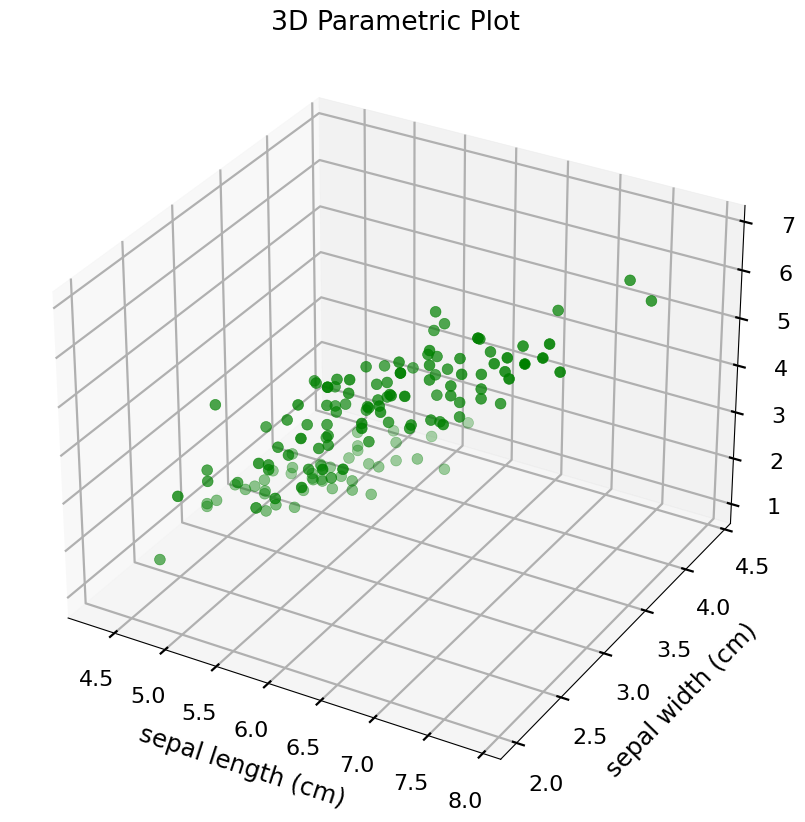

In [29]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

ax.scatter(x, y, z, c = 'g', s = 60)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('sepal length (cm)', labelpad=20)
ax.set_ylabel('sepal width (cm)', labelpad=20)
ax.set_zlabel('petal length (cm)', labelpad=20)

/var/folders/l3/nmmhn_j97ssg8t3hcyzck85m0000gn/T/ipykernel_4076/1551956938.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1, x2, cmap=plt.cm.get_cmap("viridis", 3), alpha=0.9)


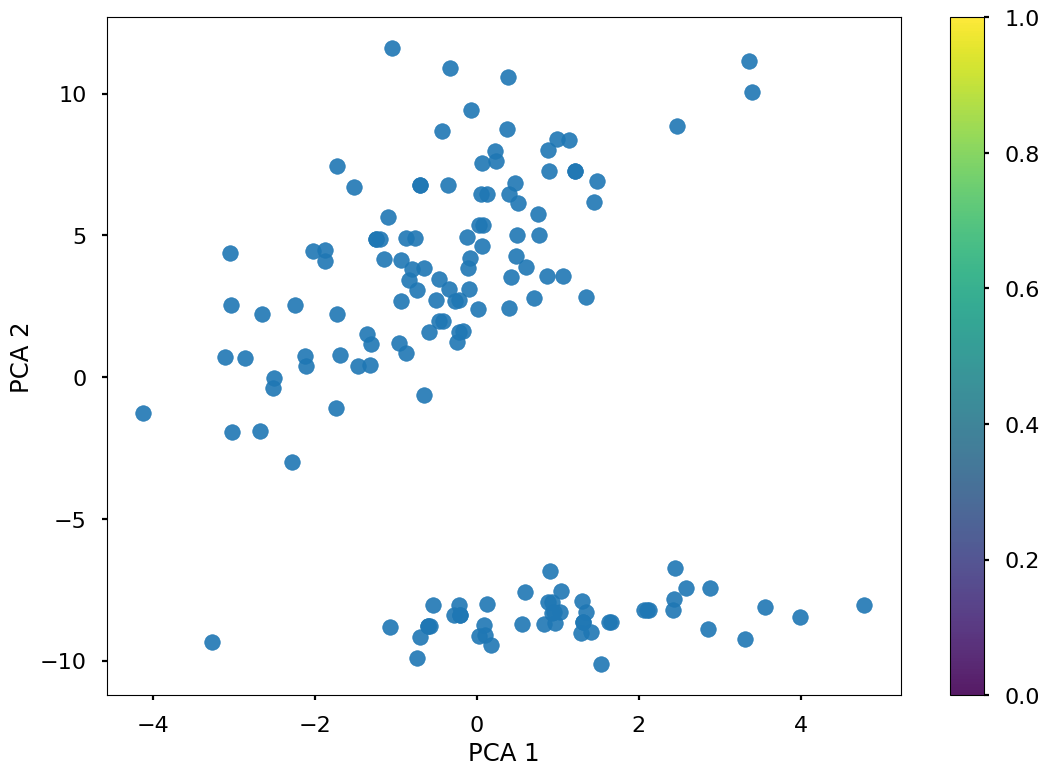

In [30]:
x1 = X_transform[:, 0]
x2 = X_transform[:, 1]
plt.scatter(x1, x2, cmap=plt.cm.get_cmap("viridis", 3), alpha=0.9)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()